In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def omega2w(omega, p, t):
    ''' converts vertical velocity from pressure coords
        to m/s.
        
        input:
         - omega : array in units of Pa/s
         - p     : pressure array in Pa
         - t     : temperature array in K
        output:
         - w     : vertical velocity array in units of m/s
    '''
    R    = 287.058
    G    = 9.80665
    rho = p / (R*t)
    w = -omega/(rho*G)
    return w

def calc_rhice(ds, varQ="Q", varT="T", z_units="hPa"):
    """ input: xarray with variables Q and T
        output: xarray of rh wrt ice
    """
    e_si = np.exp(9.550426 - 5723.265/ds[varT] +
                  3.53068*np.log(ds[varT]) - 0.00728332*ds[varT])
    if z_units=="hPa":
        z = ds.lev*100
    else:
        z=ds.lev
    w_si = (0.622 * e_si) / (z - e_si)
    w_i = ds[varQ] / (1 - ds[varQ])
    rh_ice = w_i/w_si * 100
    return rh_ice

In [6]:
iop_dir = "/glade/work/sturbeville/E3SM/inputdata/atm/cam/scam/iop/"
# iop_file = "RCE_iopfile_4scam_no-mean-ascent.nc"
iop_file = "RCE_iopfile_4scam_smooth_w_profile_304k.nc"
# iop_file = "RCE_iopfile_4scam_smooth-mean-ascent.nc"
iop_file_304k = "RCE_iopfile_4scam_smooth-mean-ascent_304ksst.nc"

In [7]:
iop = xr.open_dataset(iop_dir+iop_file)
iop = iop.isel(lat=0).isel(time=0).isel(lon=0)

iop304 = xr.open_dataset(iop_dir+iop_file_304k)
iop304 = iop304.isel(lat=0).isel(time=0).isel(lon=0)

iop304

<xarray.Dataset> Size: 2kB
Dimensions:  (lev: 72)
Coordinates:
    lon      float32 4B 0.0
    lat      float32 4B 0.0
  * lev      (lev) float32 288B 12.38 18.28 26.99 ... 9.938e+04 9.985e+04
Data variables: (12/13)
    tsec     int32 4B ...
    bdate    int32 4B ...
    Ps       float32 4B ...
    Tg       float32 4B ...
    Ptend    float32 4B ...
    phis     float32 4B ...
    ...       ...
    q        (lev) float32 288B ...
    u        (lev) float32 288B ...
    v        (lev) float32 288B ...
    omega    (lev) float32 288B ...
    divT     (lev) float32 288B ...
    divq     (lev) float32 288B ...
Attributes:
    description:  Forcing for GABLS
    setup:        avg profile of temp from last ten days of small domain and ...

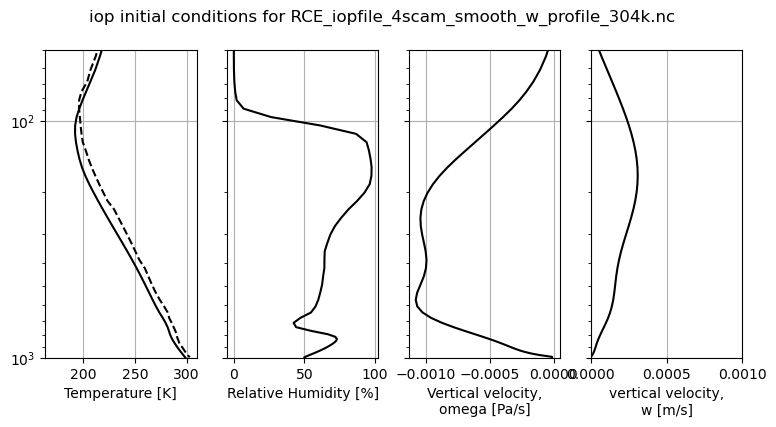

In [8]:
# plot vertical profiles of each initial condition in iop file side-by-side
fig, ax = plt.subplots(1,4, figsize=(9,4), sharey=True)
ax[0].plot(iop["T"], iop.lev/100, 'k')
ax[0].plot(iop304["T"], iop304.lev/100, 'k--')
ax[0].set(xlabel="Temperature [K]")
rhice300 = calc_rhice(iop, varQ="q", z_units="Pa")
# rhice304 = calc_rhice(iop304, varQ="q", z_units="Pa")
ax[1].plot(rhice300, iop.lev/100, 'k')
# ax[1].plot(rhice304, iop.lev/100, 'k--')
ax[1].set(xlabel="Relative Humidity [%]")
ax[2].plot(iop.omega, iop.lev/100, 'k')
# ax[2].plot(iop304.omega, iop304.lev/100, 'k--')
ax[2].set(xlabel="Vertical velocity,\nomega [Pa/s]")
w = omega2w(iop.omega, iop.lev, iop["T"])
w304 = omega2w(iop304.omega, iop304.lev, iop304["T"])
ax[3].plot(w, iop.lev/100, 'k')
# ax[3].plot(w304, iop304.lev/100, 'k--')
ax[3].set(xlabel="vertical velocity,\nw [m/s]", xlim=[0,0.001])

for i in range(4):
    ax[i].grid(True)
    if i>0:
        ax[i].set(ylabel="")

ax[0].invert_yaxis()
ax[0].set_yscale("log")
ax[0].set(ylim=[1000,50])
fig.suptitle("iop initial conditions for "+iop_file)
plt.savefig("../plots/iop_ic_{}.png".format(iop_file.split(".")[0]))
plt.show()

# save new iop file

Change something about the iop file from a different file, then save it as a new file

In [10]:
iop['T'] = iop304['T']
iop['T']

<xarray.DataArray 'T' (lev: 72)> Size: 288B
array([237.54498, 237.54498, 237.54498, 237.54498, 237.54498, 237.54498,
       237.54498, 237.54498, 237.54498, 246.66336, 243.46333, 237.71979,
       235.72939, 232.66866, 229.76071, 225.85208, 222.91647, 219.78549,
       216.42685, 212.25308, 207.12366, 203.95558, 198.41026, 196.15294,
       196.1689 , 196.90475, 197.64793, 198.51389, 199.75592, 202.65785,
       205.23793, 208.31601, 211.83902, 215.55377, 219.54225, 223.58385,
       229.8809 , 234.09912, 238.33206, 242.44682, 246.52002, 250.38261,
       254.15886, 259.50653, 262.9833 , 266.42502, 270.0862 , 274.03085,
       278.2124 , 281.6486 , 283.0611 , 285.45374, 287.39917, 289.022  ,
       290.27203, 290.66534, 291.35013, 292.13284, 292.5119 , 293.3147 ,
       294.1489 , 295.4248 , 296.26797, 297.10657, 297.92023, 298.72055,
       299.48114, 300.2156 , 300.8973 , 301.84473, 302.4816 , 302.80533],
      dtype=float32)
Coordinates:
    lon      float32 4B 0.0
    lat      float32 4B 0.0
  * lev      (lev) float32 288B 12.38 18.28 26.99 ... 9.938e+04 9.985e+04

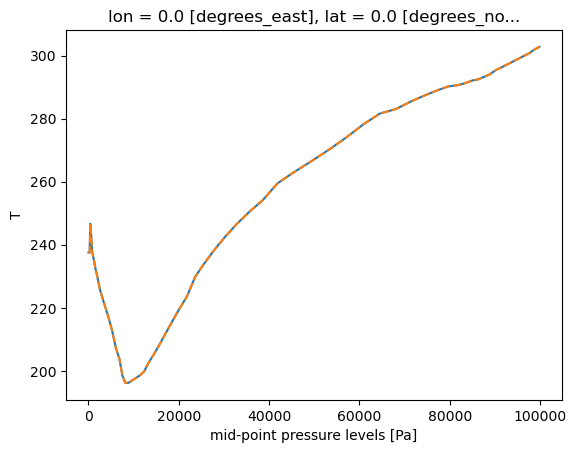

In [12]:
iop['T'].plot()
iop304['T'].plot(linestyle="dashed")
plt.show()

In [15]:
print(iop['T'][0].values, iop['T'][-1].values)

237.54498 302.80533


In [16]:
iop.lev[-1].values

array(99849.64, dtype=float32)

In [17]:
# iop.to_netcdf(iop_dir+"RCE_iopfile_4scam_smooth_w_profile_304k.nc")